#### Emerging Technology - Capstone Project
## AJ Dave Obis and Juan Francis Tuatis

#### 1. Problem Definition
Which type of screen time (Netflix vs. social media) is more harmful to student performance?

#### 2. Data Understanding and Preprocessing 


In [2]:
## Libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading of Data to be used
data = pd.read_csv("student_habits_performance(in).csv")

## Transform data into DataFrame 
data_df = pd.DataFrame(data)

data_df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


#### Dataset Inspection

In [3]:
## Dataset Inspection
print("Number of rows: ", data_df.shape[0])
print("Number of columns: ", data_df.shape[1])

## Checking for missing values 
missing_val = data_df.isnull().sum()
print("Number of missing values:\n", missing_val)

Number of rows:  1000
Number of columns:  16
Number of missing values:
 student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


### 3. Exploratory Data Analysis (EDA)
#### Categorical Variables (apply label/one-hot encoding)

In [4]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ["diet_quality", "internet_quality"]
ordinal_map = [["Poor", "Fair", "Good"], ["Poor", "Average", "Good"]]

encoder = OrdinalEncoder(categories = ordinal_map)
data_df[ordinal_cols] = encoder.fit_transform(data_df[ordinal_cols])
data_df[ordinal_cols]

# Ordinal Encoder for "parental_education_level"
data_df["parental_education_level"] = data_df["parental_education_level"].fillna('Unknown')
education_order = [["Unknown", "High School", "Bachelor", "Master", "PhD"]]
encoder2 = OrdinalEncoder(categories = education_order)

data_df[["parental_education_level"]] = encoder2.fit_transform(data_df[["parental_education_level"]])
data_df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,1.0,6,3.0,1.0,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,2.0,6,1.0,1.0,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,0.0,1,1.0,0.0,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,0.0,4,3.0,2.0,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,1.0,3,3.0,2.0,1,No,66.4


Ordinal Encoding was used to convert the categorical data into numerical values while perservinf the inherent ranking of the categories. Poor --> 0, Fair/Average --> 1, Good --> 2.

For the missing values in the "parental_education_level" another order was introduced called "Unknown". This helps in keeping the informations and helps in pattern recognition, while preserving all the data.

In [5]:
from sklearn.preprocessing import LabelEncoder

label_cols = ["gender", "part_time_job","extracurricular_participation"]
le = LabelEncoder()
data_df["gender"] = le.fit_transform(data_df["gender"])
data_df["part_time_job"] = le.fit_transform(data_df["part_time_job"])
data_df["extracurricular_participation"] = le.fit_transform(data_df["extracurricular_participation"])

data_df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,1.0,6,3.0,1.0,8,1,56.2
1,S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,2.0,6,1.0,1.0,8,0,100.0
2,S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,0.0,1,1.0,0.0,1,0,34.3
3,S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,0.0,4,3.0,2.0,1,1,26.8
4,S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,1.0,3,3.0,2.0,1,0,66.4


Since there are only 2 values for the columns "gender", "part_time_job", and "extracurricular_participation" label encoding was used. There are no inherent orders for their values, only two categories so Label Enconding is efficient. This avoids the addition of unnecessary columns that one-hot encoding would create.

#### Adding of New Feature
"total_screen_time" this captures the overall exposure of the students weather it is Netflix or social media.
"netflix_social_ratio" reletive prefernece between Netflix vs social media.
"screen_study_ratio" "screen_sleep_ratio" reflects the interactions between screen time and other habits like study and sleep hours.


In [8]:
data_df["total_screen_time"] = data_df["netflix_hours"] + data_df["social_media_hours"]
data_df["netflix_social_ratio"] = data_df["netflix_hours"] / (data_df["social_media_hours"] + 0.1)
## 0.1 is added to the denominator is act as an safeguard against divsion by zero.

data_df["screen_study_ratio"] = data_df["total_screen_time"] / (data_df["study_hours_per_day"] + 0.1)
data_df["screen_sleep_ratio"] = data_df["total_screen_time"] / (data_df["sleep_hours"] + 0.1)

## Rearraging the column order
data_df = data_df[["student_id", "age", "gender", "study_hours_per_day",
                   "sleep_hours", "social_media_hours", "netflix_hours", 
                   "total_screen_time", "netflix_social_ratio", "part_time_job", 
                   "attendance_percentage", "sleep_hours",  "screen_study_ratio",
                   "screen_sleep_ratio", "diet_quality", "exercise_frequency",
                   "parental_education_level", "internet_quality", "mental_health_rating",
                   "extracurricular_participation", "exam_score"]]
data_df.head()


,student_id,age,gender,study_hours_per_day,sleep_hours,social_media_hours,netflix_hours,total_screen_time,netflix_social_ratio,part_time_job,...,sleep_hours,screen_study_ratio,screen_sleep_ratio,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,0,0.0,8.0,1.2,1.1,2.3,0.846154,0,...,8.0,23.000000,0.283951,1.0,6,3.0,1.0,8,1,56.2
1,S1001,20,0,6.9,4.6,2.8,2.3,5.1,0.793103,0,...,4.6,0.728571,1.085106,2.0,6,1.0,1.0,8,0,100.0
2,S1002,21,1,1.4,8.0,3.1,1.3,4.4,0.406250,0,...,8.0,2.933333,0.543210,0.0,1,1.0,0.0,1,0,34.3
3,S1003,23,0,1.0,9.2,3.9,1.0,4.9,0.250000,0,...,9.2,4.454545,0.526882,0.0,4,3.0,2.0,1,1,26.8
4,S1004,19,0,5.0,4.9,4.4,0.5,4.9,0.111111,0,...,4.9,0.960784,0.980000,1.0,3,3.0,2.0,1,0,66.4


#### Scaling (For models like K-Means and regression)

In [9]:
from sklearn.preprocessing import StandardScaler

numeric_features = ["age", "study_hours_per_day", "sleep_hours", 
                    "social_media_hours", "netflix_hours", "total_screen_time", 
                    "netflix_social_ratio", "attendance_percentage", 
                    "sleep_hours",  "screen_study_ratio", "screen_sleep_ratio", 
                    "exercise_frequency", "internet_quality", "mental_health_rating", "extracurricular_participation"]

scaler = StandardScaler()
data_df[numeric_features] = scaler.fit_transform(data_df[numeric_features])
data_df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_11164\2565375380.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[numeric_features] = scaler.fit_transform(data_df[numeric_features])


,student_id,age,gender,study_hours_per_day,sleep_hours,social_media_hours,netflix_hours,total_screen_time,netflix_social_ratio,part_time_job,...,sleep_hours,screen_study_ratio,screen_sleep_ratio,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,1.084551,0,-2.418068,1.248120,-1.114064,-0.669750,-1.266536,-0.143060,0,...,1.248120,4.087004,-1.392043,1.0,1.461166,3.0,-0.392302,0.900186,1.464464,56.2
1,S1001,-0.215870,0,2.281707,-1.525661,0.251315,0.446965,0.484551,-0.158934,0,...,-1.525661,-0.250328,1.401688,2.0,1.461166,1.0,-0.392302,0.900186,-0.682844,100.0
2,S1002,0.217604,1,-1.464491,1.248120,0.507324,-0.483631,0.046779,-0.274687,0,...,1.248120,0.179047,-0.487973,0.0,-1.008689,1.0,-1.768800,-1.559339,-0.682844,34.3
3,S1003,1.084551,0,-1.736942,2.227102,1.190013,-0.762810,0.359473,-0.321440,0,...,2.227102,0.475301,-0.544911,0.0,0.473224,3.0,0.984196,-1.559339,1.464464,26.8
4,S1004,-0.649344,0,0.987566,-1.280916,1.616694,-1.228108,0.359473,-0.362998,0,...,-1.280916,-0.205104,1.035169,1.0,-0.020747,3.0,0.984196,-1.559339,-0.682844,66.4


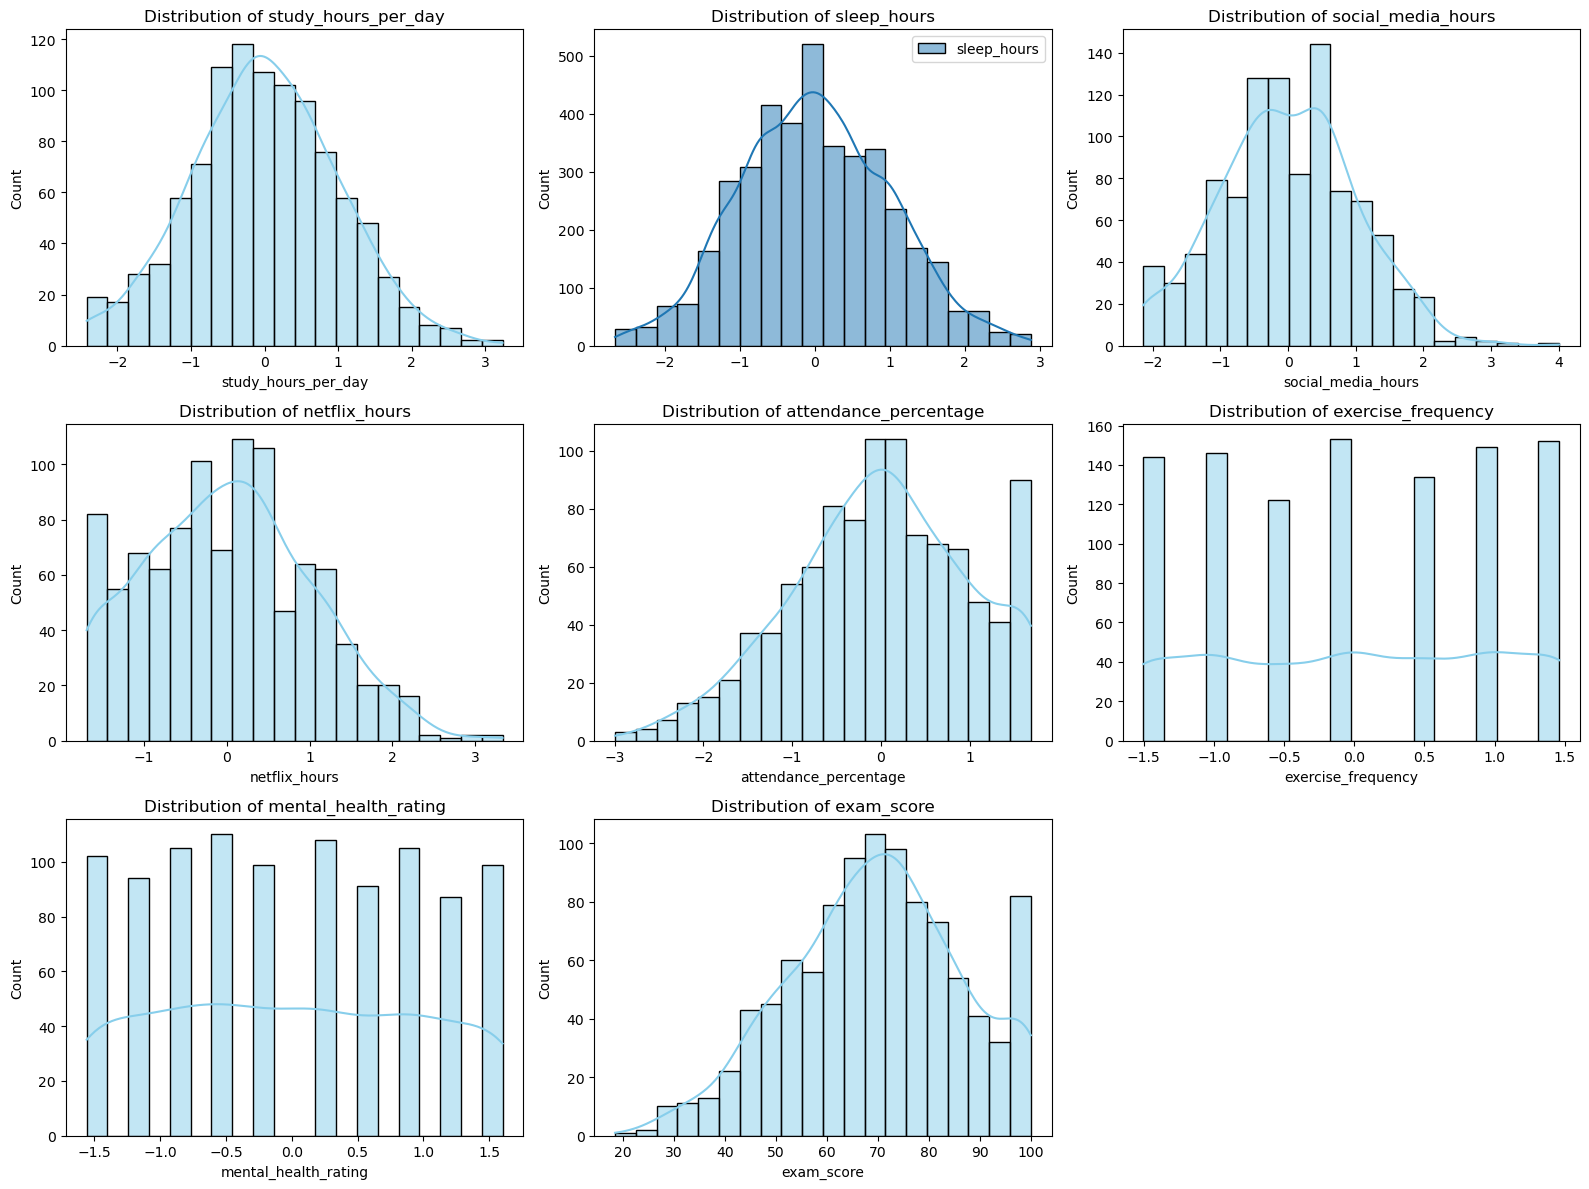

In [13]:
num_cols = [
    'study_hours_per_day', 'sleep_hours', 'social_media_hours',
    'netflix_hours', 'attendance_percentage', 'exercise_frequency',
    'mental_health_rating', 'exam_score'
]

# Plot histograms
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

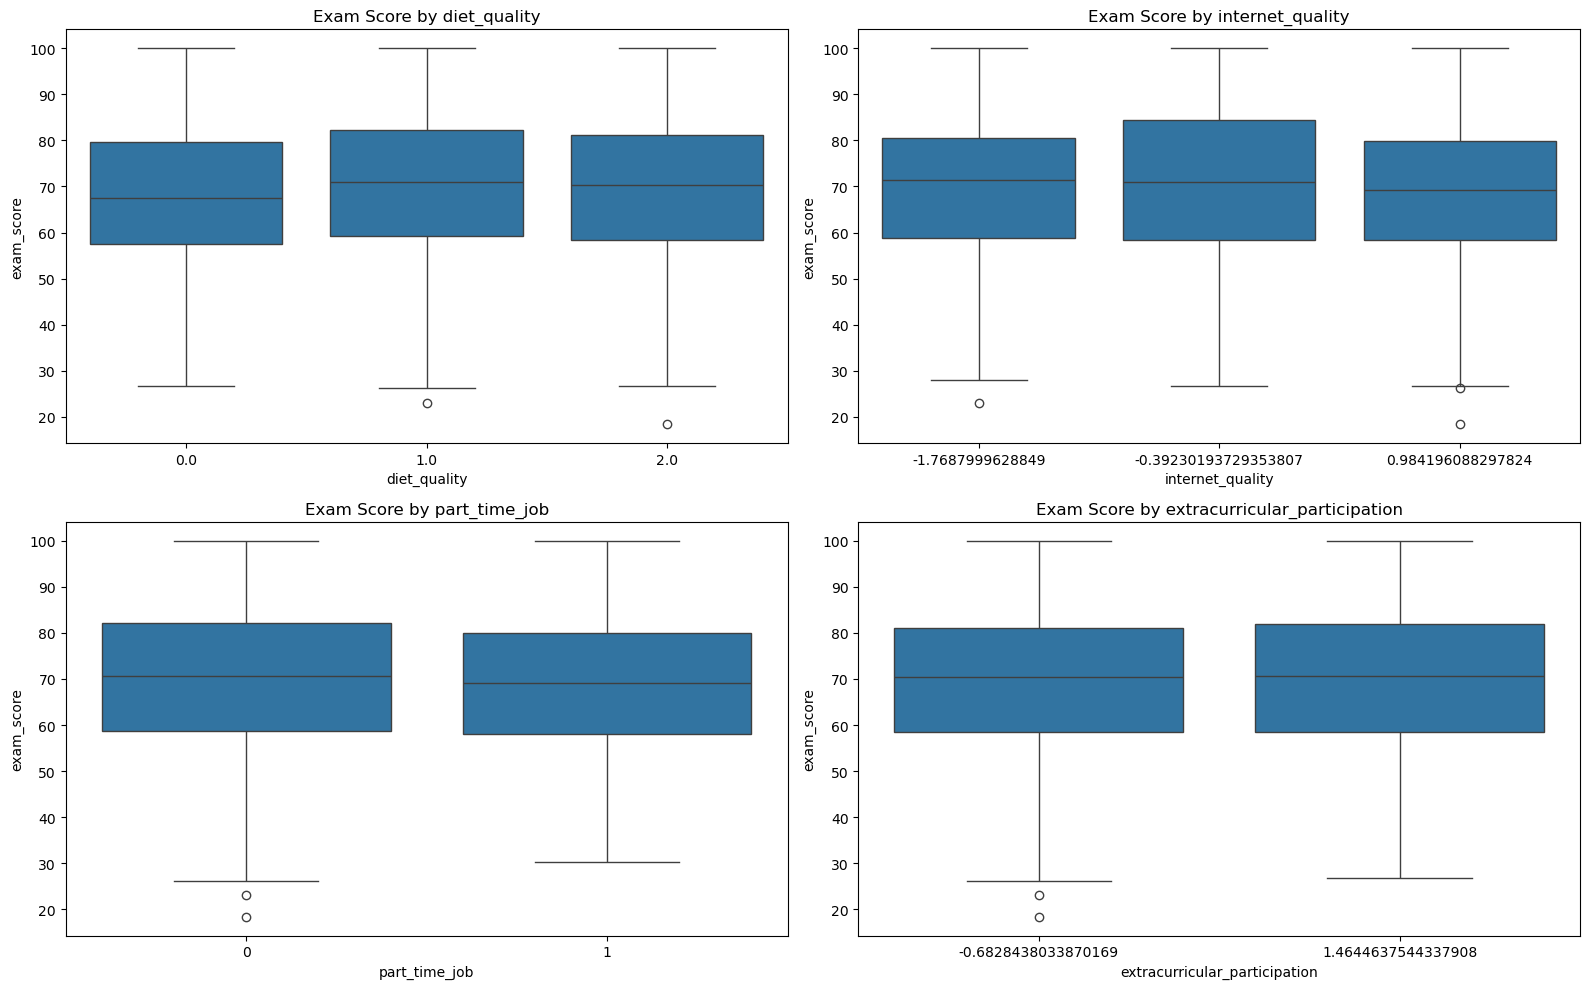

In [25]:
cat_cols = ['diet_quality', 'internet_quality', 'part_time_job', 'extracurricular_participation']

plt.figure(figsize=(16, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='exam_score', data=data_df)  # Not df[[col]], just col name
    plt.title(f'Exam Score by {col}')
plt.tight_layout()
plt.show()


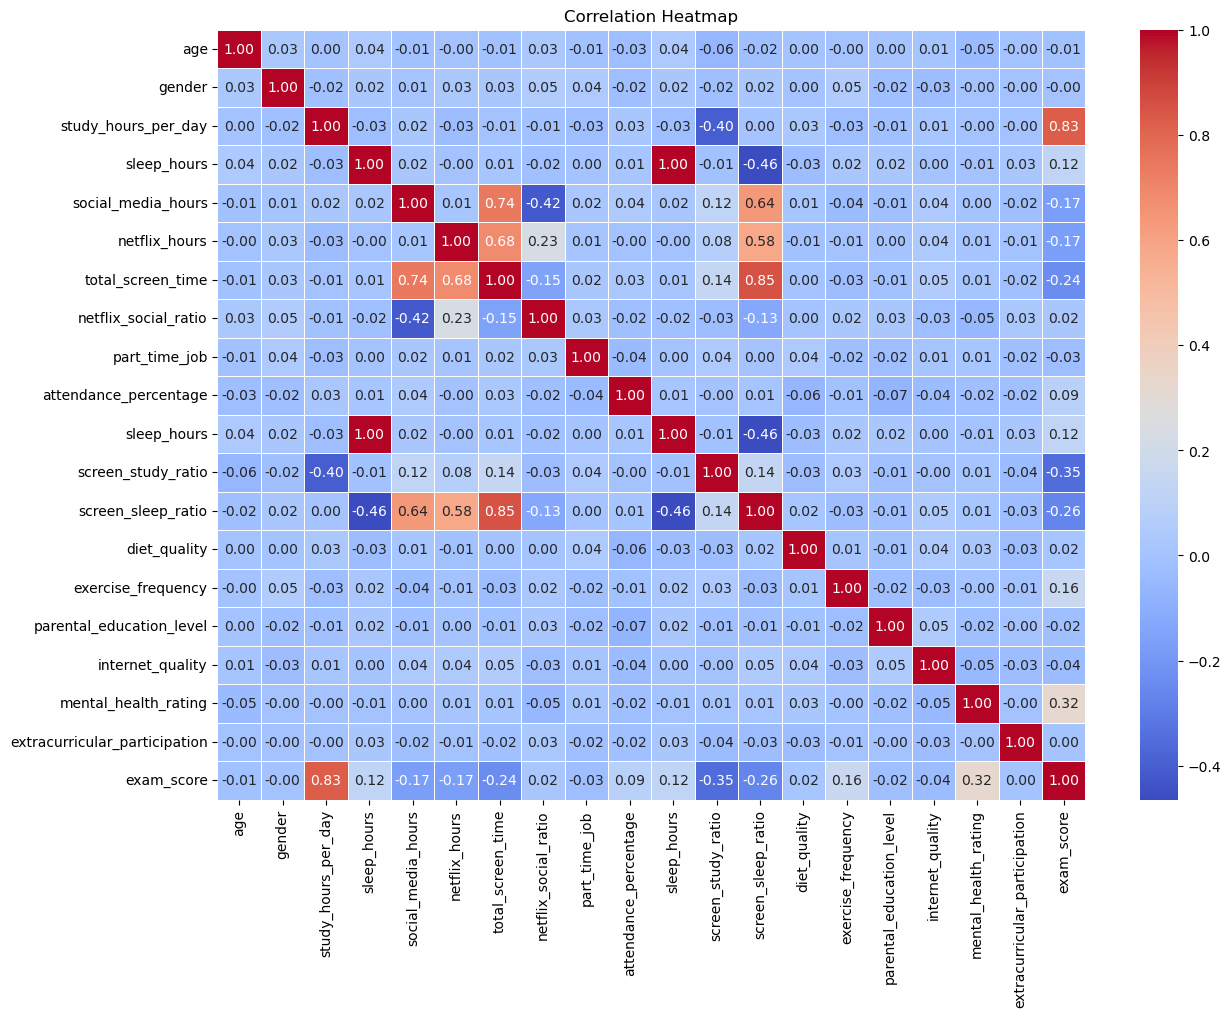

Top correlations with exam_score:
 study_hours_per_day     0.825419
screen_study_ratio      0.354767
mental_health_rating    0.321523
screen_sleep_ratio      0.263949
total_screen_time       0.237631
Name: exam_score, dtype: float64


In [20]:
# Only include numeric columns (after encoding)
corr_matrix = data_df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

cor_target = corr_matrix['exam_score'].abs().sort_values(ascending=False)
print("Top correlations with exam_score:\n", cor_target[1:6])


#### Clustering (Unsupervised Learning)
Apply K-Means clustsering using lifestyle features (excluding exam scores)